In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

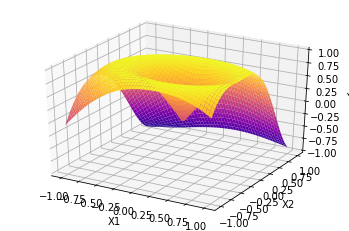

In [3]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [4]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.622055158630468


100 Error =  0.21569548958120052


200 Error =  0.05748305137658749


300 Error =  0.038505170197808546


400 Error =  0.038408130370273116


500 Error =  0.03840318291601054


600 Error =  0.038403068082389656


700 Error =  0.03840306806909348


800 Error =  0.038403068068995384


900 Error =  0.03840306806899506


1000 Error =  0.03840306806899505


1100 Error =  0.03840306806899505


1200 Error =  0.03840306806899505


1300 Error =  0.03840306806899505


1400 Error =  0.03840306806899505


1500 Error =  0.03840306806899505


1600 Error =  0.03840306806899505


1700 Error =  0.03840306806899505


1800 Error =  0.03840306806899505


1900 Error =  0.03840306806899505


TclError: invalid command name "pyimage20"

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

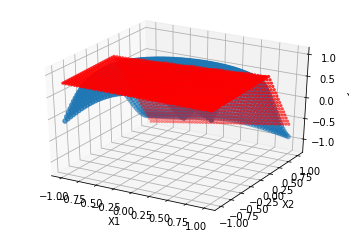

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [7]:
layer1.weights, layer2.weights

(array([[ 0.28340871],
        [-2.34615331]]), array([[-0.01448408],
        [ 0.99841632]]))

In [8]:
outs = []
for i in range(n_hidden):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

# Repeat steps below to add new neuron to the network

In [10]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [31]:
layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

In [32]:
l1_add = tnn.LinearLayer(2, 1, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(1, 1, optimizer=optimizer)

In [33]:
new_w1 = np.hstack([layer1.weights, l1_add.weights])
new_w1

array([[ 1.03378763, -1.06285503, -1.11315648, -0.5851004 ],
       [-2.78909757,  2.49042408, -1.6756795 , -0.342063  ]])

In [34]:
new_b1 = np.hstack([layer1.bias, l1_add.bias])
new_b1

array([0.64607521, 1.15961398, 1.07233481, 0.        ])

In [35]:
i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o), l2_add.weights.reshape(2,i_//2,o_)*0], axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_w2

array([[ 0.66567481],
       [ 0.84361178],
       [-0.1114689 ],
       [-0.        ],
       [ 1.49073097],
       [ 0.55754337],
       [ 0.67218828],
       [ 0.        ]])

In [36]:
new_b2 = deepcopy(layer2.bias)
new_b2

array([-0.38724678])

## Creating a new network with added neuron

In [27]:
## creating new network with added neuron
optimizer = tnn.Adam()
# n_hidden = 2
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)

In [28]:
# %matplotlib tk
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)

# yout = net.forward(xx)
# ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

In [29]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.03535903667455688


100 Error =  0.025429510026552322


200 Error =  0.02363422613934835


300 Error =  0.023514328800945377


400 Error =  0.023485914274712603


500 Error =  0.023480588747083204


600 Error =  0.023477084280992017


700 Error =  0.02347603640842123


800 Error =  0.023475970747022547


900 Error =  0.02347596530248352


1000 Error =  0.023489373692075537


1100 Error =  0.023475968463428986


1200 Error =  0.023475964951323498


1300 Error =  0.02347596495121025


1400 Error =  0.023480757433054607


1500 Error =  0.023475964994304304


1600 Error =  0.023475964951422595


1700 Error =  0.023486233416446085


1800 Error =  0.023475936629528144


1900 Error =  0.023475936783652125


2000 Error =  0.023475937784493073


2100 Error =  0.02353999671036135


2200 Error =  0.023475940964018435


2300 Error =  0.02347665861682417


2400 Error =  0.023475936645524217


2500 Error =  0.023475938094956038


TclError: invalid command name "pyimage65"

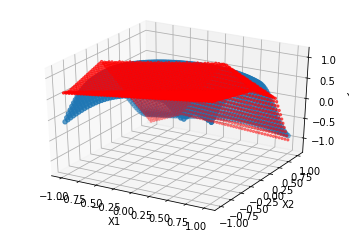

In [30]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### If the additional neuron was not helpful, reset the network

In [289]:
### rest if the neuron added is not good enough
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

### Plot the independent non-linear units (neurons)

In [49]:
outs = []
for i in range(len(layer1.bias)):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [50]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network end to end

In [295]:
n_hidden = len(layer1.bias)
n_hidden

11

In [296]:
## creating new network with added neuron
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

In [297]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5478159969178776


100 Error =  0.021579023378722518


200 Error =  0.01565208745692147


300 Error =  0.010445673700101686


400 Error =  0.007731488352603373


500 Error =  0.0071533967425648


600 Error =  0.006551826878365467


700 Error =  0.006249716245710482


800 Error =  0.0060481816939894585


900 Error =  0.005775691489370389


1000 Error =  0.005439062910399966


1100 Error =  0.004499680639089546


1200 Error =  0.003997031049987772


1300 Error =  0.0038498274720964666


1400 Error =  0.0037571028235420384


1500 Error =  0.003690688396102436


1600 Error =  0.003642531562238269


1700 Error =  0.00360645870835324


1800 Error =  0.0035788027281062882


1900 Error =  0.003554838963925606


2000 Error =  0.0035382347597906643


2100 Error =  0.0035391241952844703


2200 Error =  0.003514303637016338


2300 Error =  0.0035023625137458425


2400 Error =  0.003495331538302556


2500 Error =  0.0034706045233346854


2600 Error =  0.0034648761881058304


2700 Error

TclError: invalid command name "pyimage430"